# Stryde Gradients - Visualize Shot Gather and Shot Alignment

This notebook contains basic data visualization and analysis of the data collected with Stryde nodes at KAUST during the Stryde Gradients experiment on Nov 11 2024.

The dataset is acquired as follows:

- <font color='blue'>Receivers</font>

    1 line of 44 pairs of buried receivers, each pair equally spaced by 2m for a total lenght of 86m (and with each sensor in the pair spaced by 15cm)
  
    1 receiver placed next to the 22nd pair, 15cm along the crossline direction
  
    1 receiver placed near (and following) the source

- <font color='red'>Sources</font>

    3 sources on the right side of the receiver line at Point 101, 144, 188

    49/31/30 shots per source

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pylops
import matplotlib.pyplot as plt

from matplotlib.colors import SymLogNorm
from pylops.signalprocessing import FFT2D

from pystryde.reader import *
from pystryde.preproc import *
from pystryde.cmap import cmaps
from pystryde.visual import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data shape: (49, 1, 3, 90, 4200)


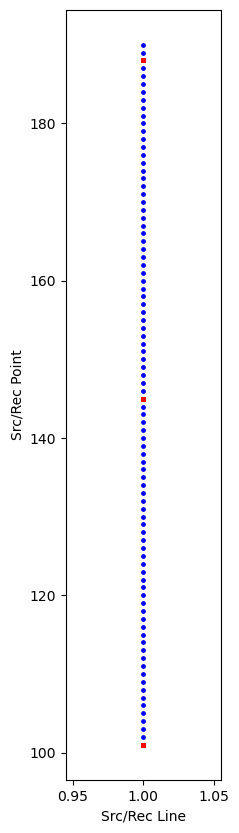

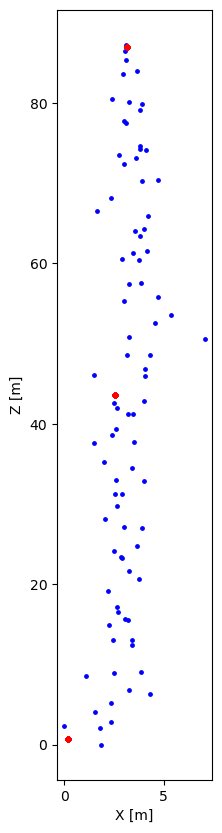

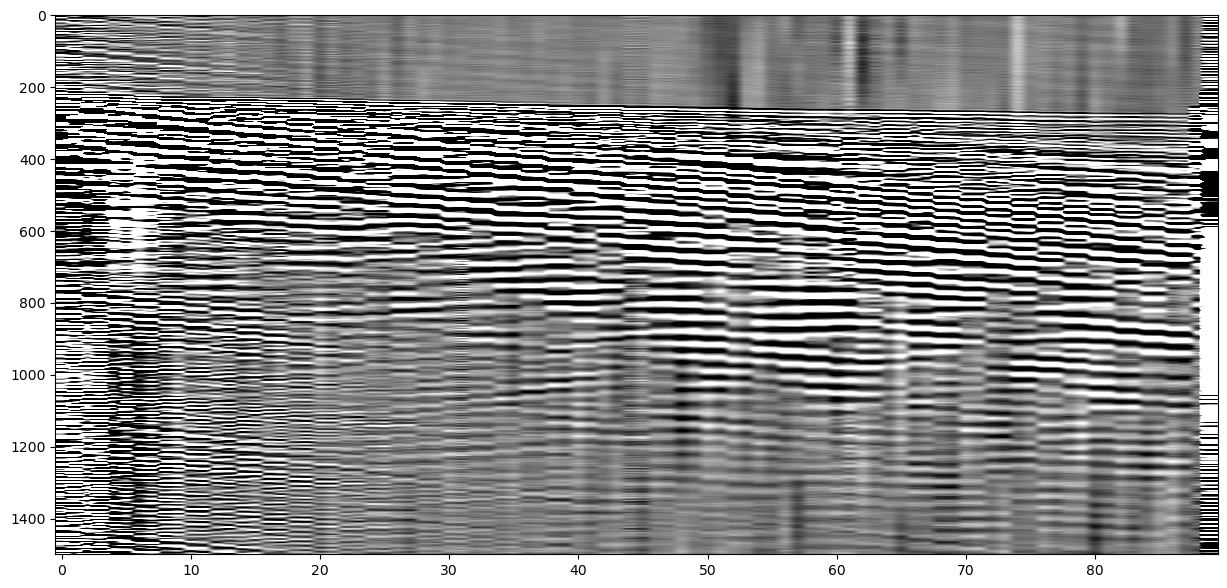

In [9]:
fs = strydeshots('ShotGatherSEGY200ms/')
fs.interpret()
fs.getshot()

print('Data shape:', fs.data.shape)

fs.plotgeom(coords=False, figsize=(2, 10))
fs.plotgeom(local=True, figsize=(2, 10))

plt.figure(figsize=(15,7))
plt.imshow(fs.data[48, 0, 0, :, :1500].T, cmap='gray', vmin=-1e-3, vmax=1e-3)
plt.axis('tight');

## Shot alignment and stack

In [18]:
data = fs.data
data = np.squeeze(data,axis=1)
data = data[:,:,:-1,:]
x = np.zeros(88)
t = fs.t

ishots = [0,1,2] #Shot location indexes
nshots = [49,31,30] #Number of shots for each location
irecs=[4,40,80] #Receiver's index used for the alignment for each shot location (some indexes away from the original receiver index where source is located in order to hinder the noisy source)

-----------WORKING ON SHOT : 0-----------
Indices of max aligment: [289 288 288 288 288 288 287 288 287 289 289 289 289 288 289 289 289 290
 290 289 303 304 303 305 303 306 306 305 305 304 307 307 308 308 305 307
 307 306 308 309 308 308 308 308 309 308 308 309 309]
Indices of max aligment after shifts: [289 289 289 289 289 289 289 289 289 289 289 289 289 289 289 289 289 289
 289 289 289 289 289 289 289 289 289 289 289 289 289 289 289 289 289 289
 289 289 289 289 289 289 289 289 289 289 289 289 289]
-----------WORKING ON SHOT : 1-----------
Indices of max aligment: [289 290 298 300 301 300 300 299 299 300 301 302 300 301 301 303 300 300
 303 302 302 304 302 304 304 305 304 303 304 304 303]
Indices of max aligment after shifts: [289 289 289 289 289 289 289 289 289 289 289 289 289 289 289 289 289 289
 289 289 289 289 289 289 289 289 289 289 289 289 289]
-----------WORKING ON SHOT : 2-----------
Indices of max aligment: [289 297 295 295 297 297 289 289 289 289 289 289 289 289 290 290 290 

/home/khatamm/anaconda3/envs/strydeenv/lib/python3.12/site-packages/pystryde/preproc.py:201: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig2, ax = plt.subplots(1, 1, figsize=(12, 3))


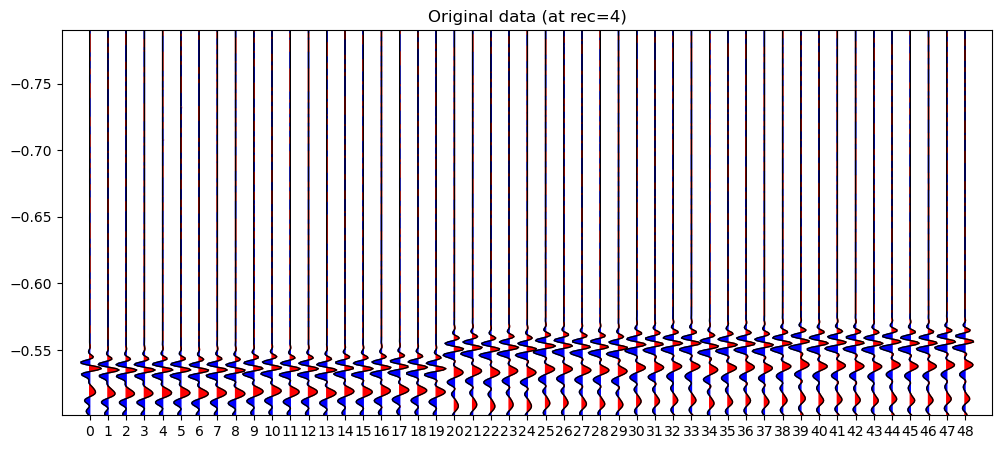

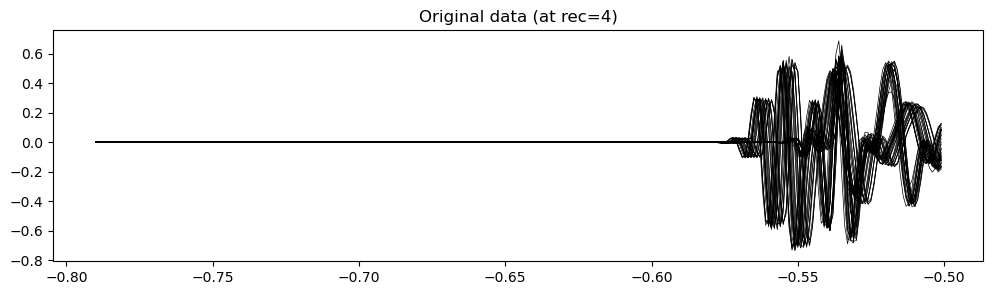

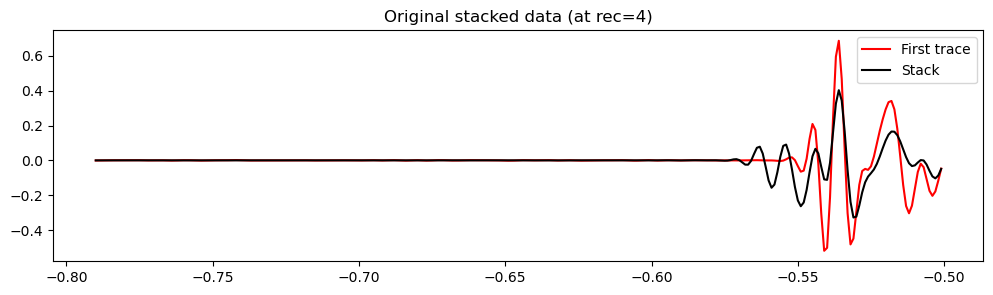

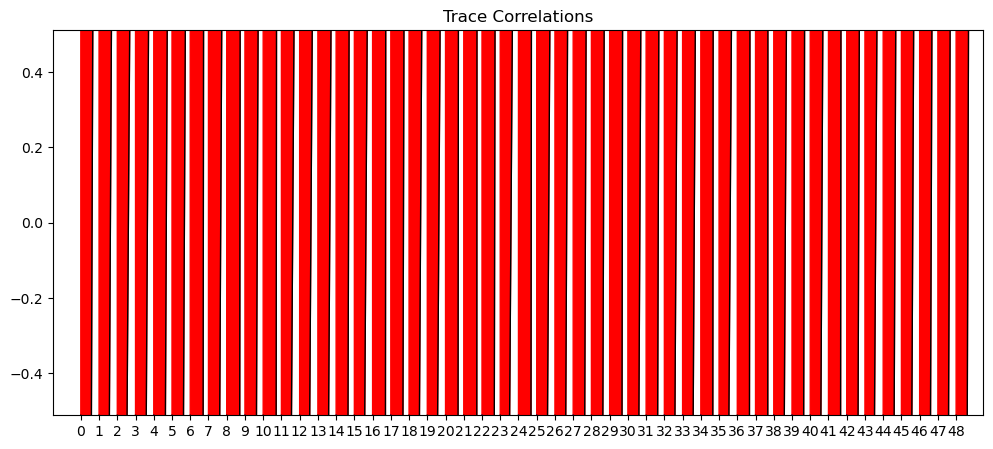

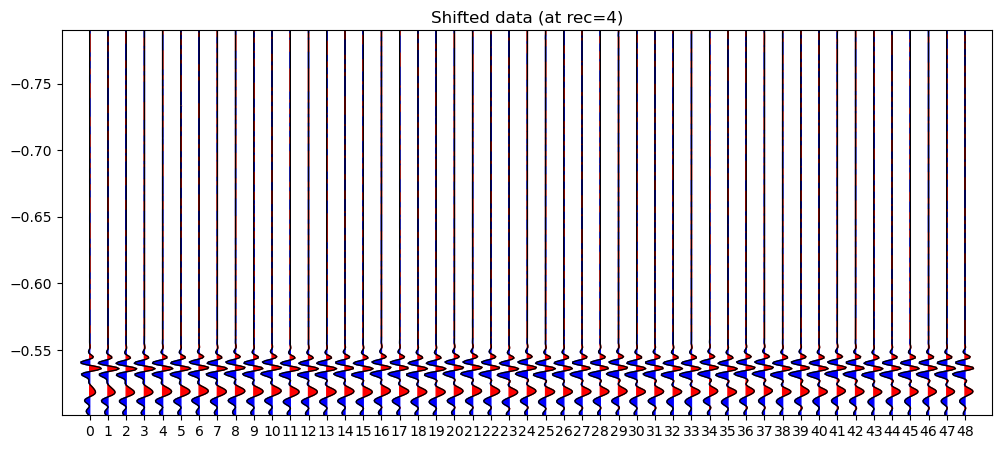

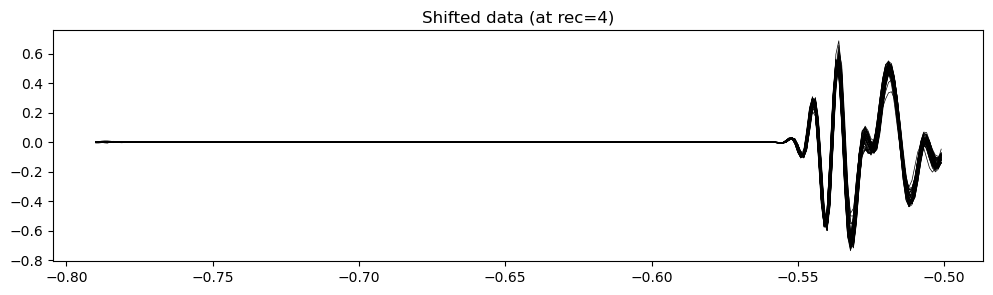

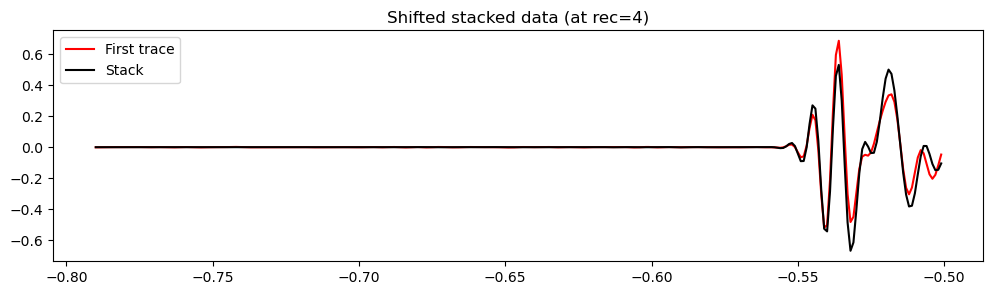

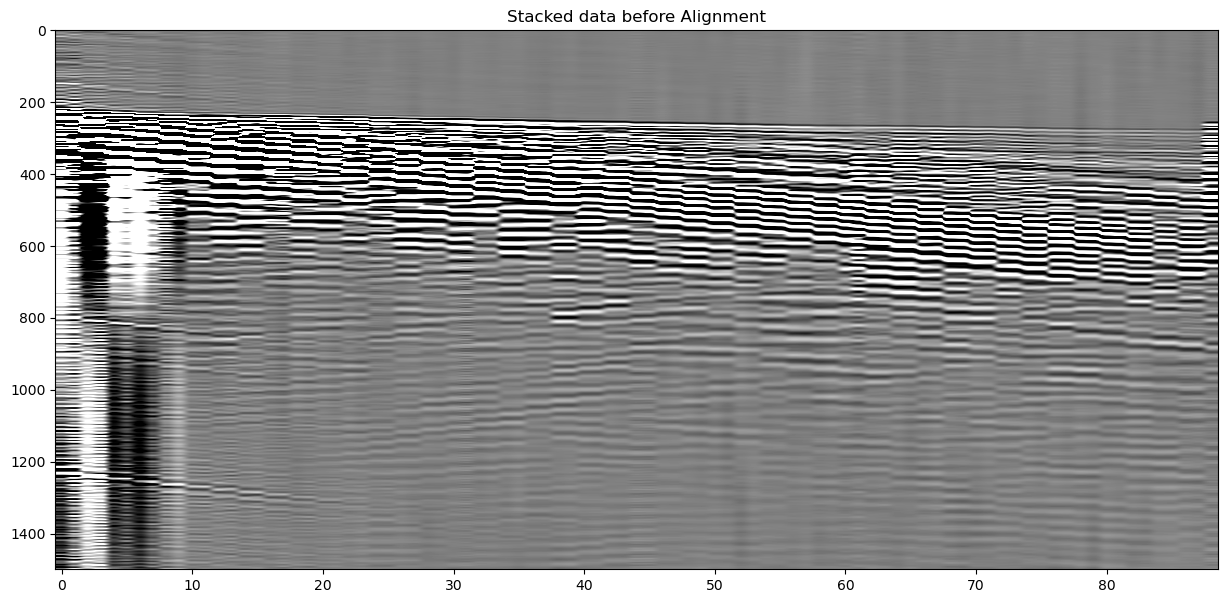

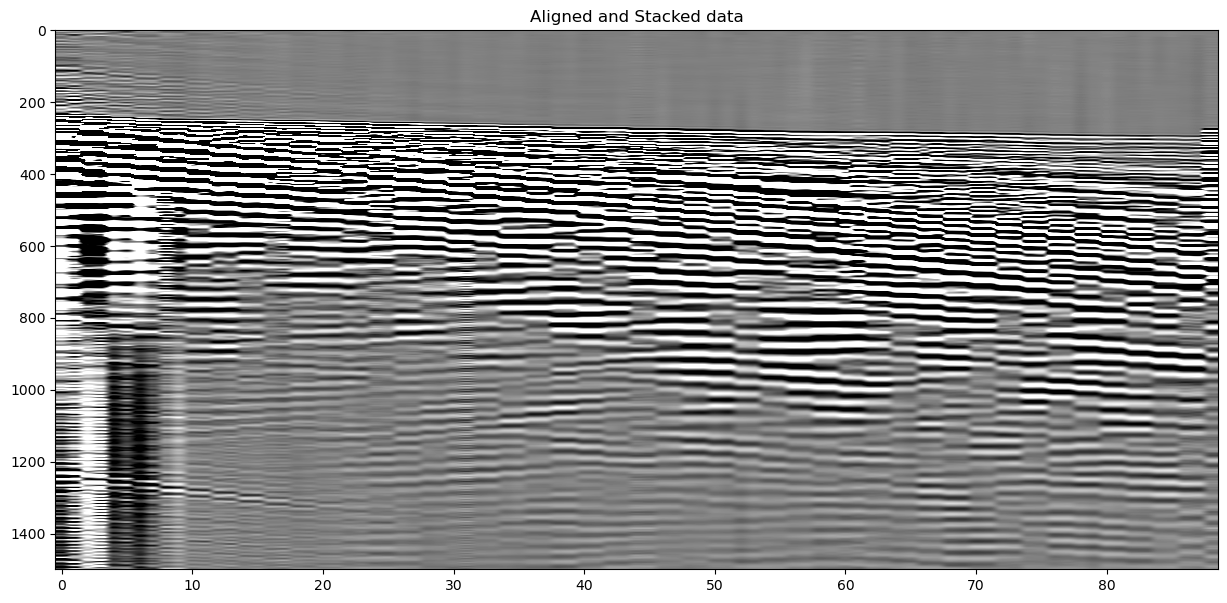

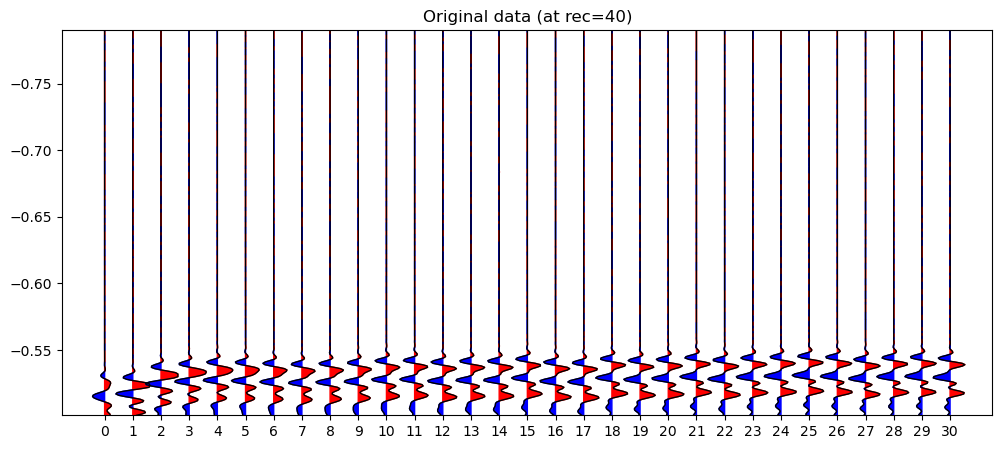

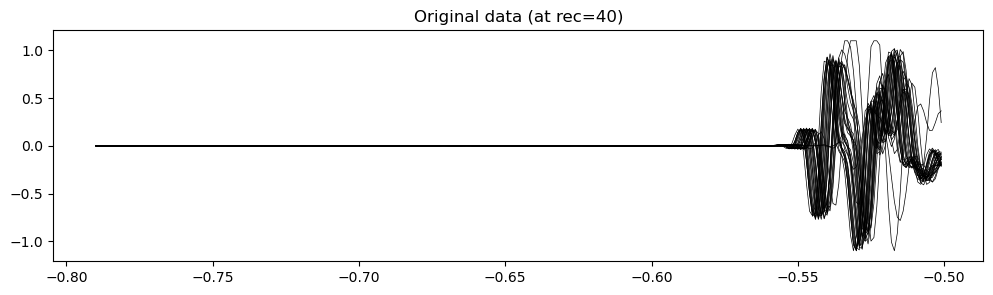

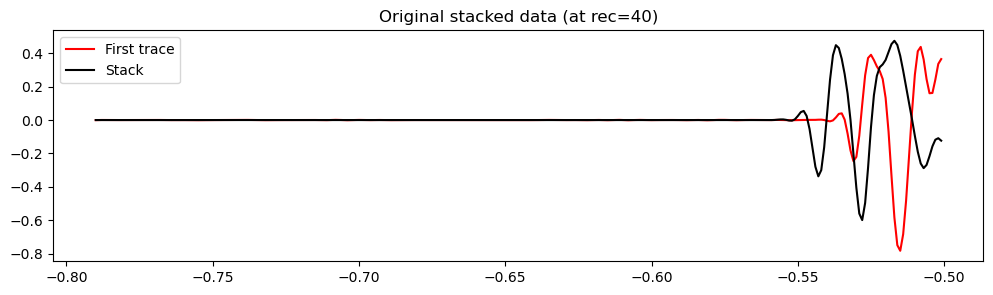

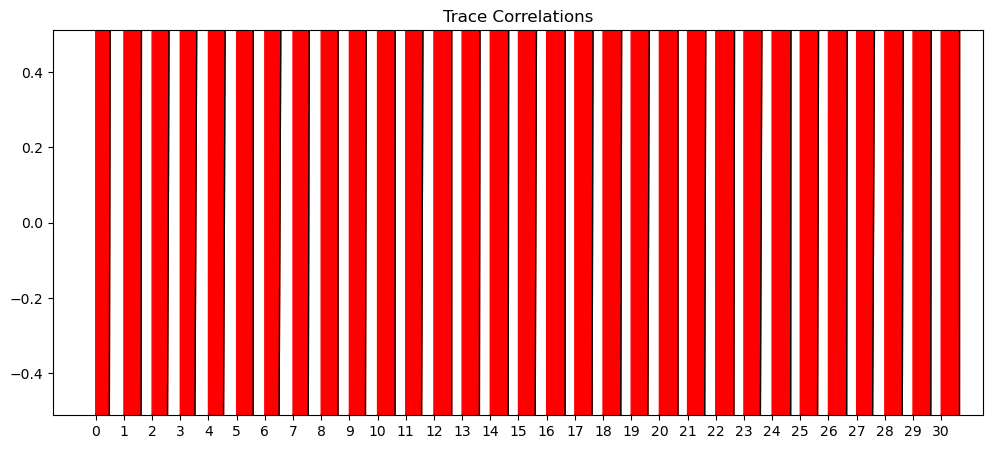

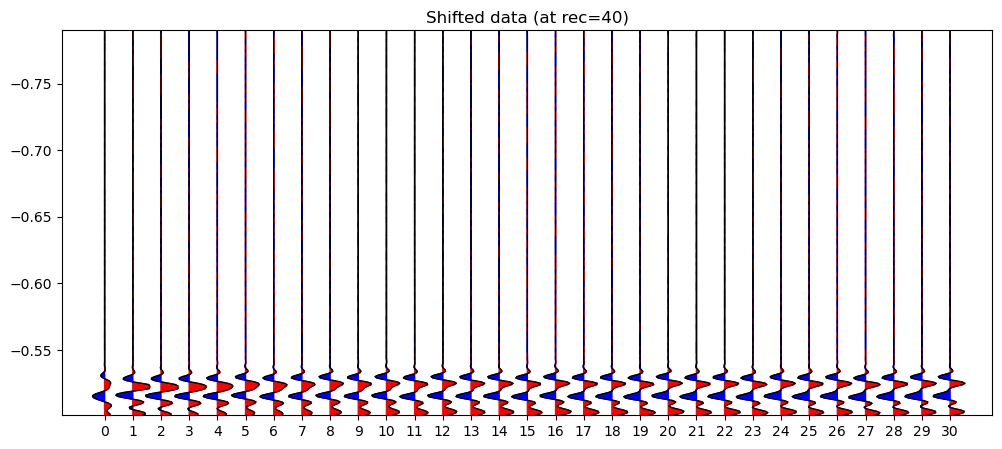

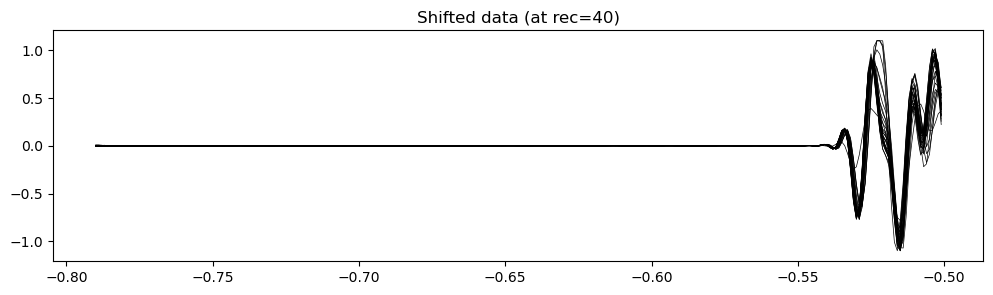

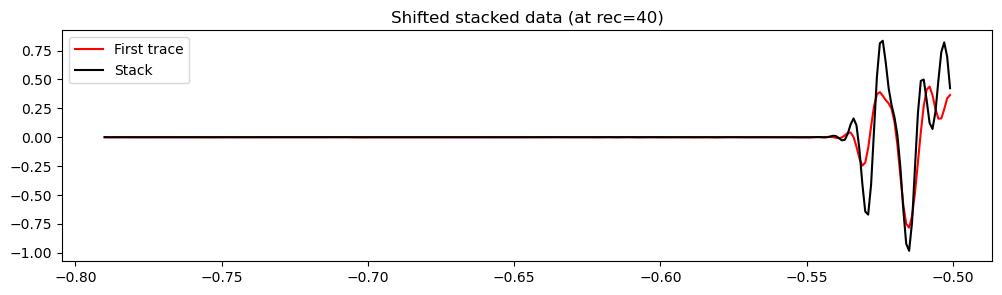

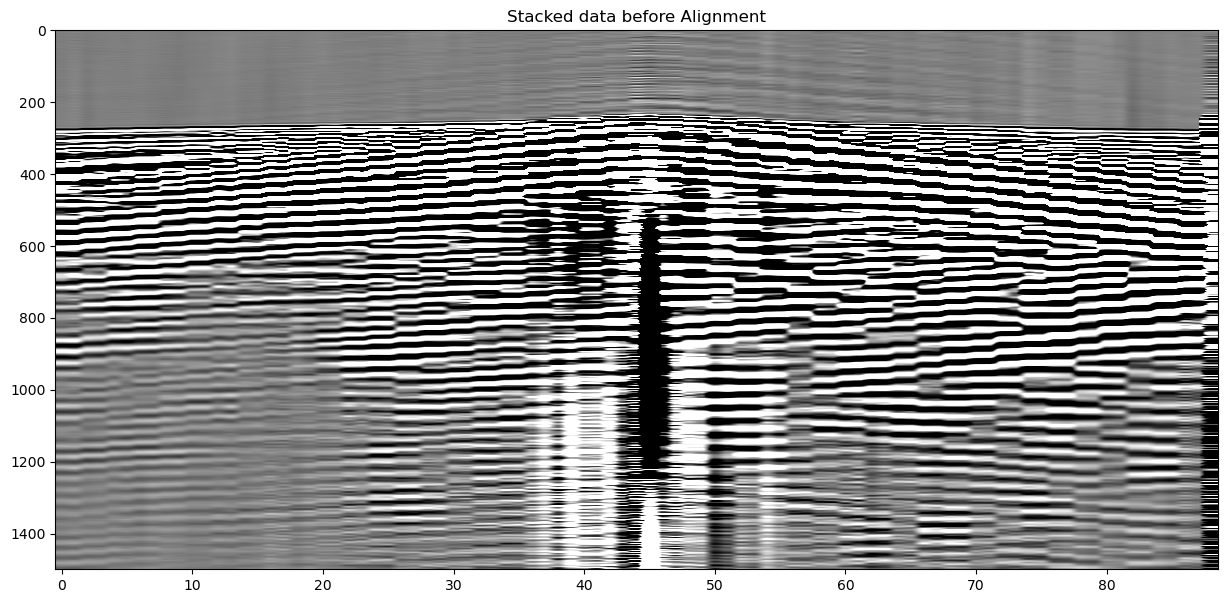

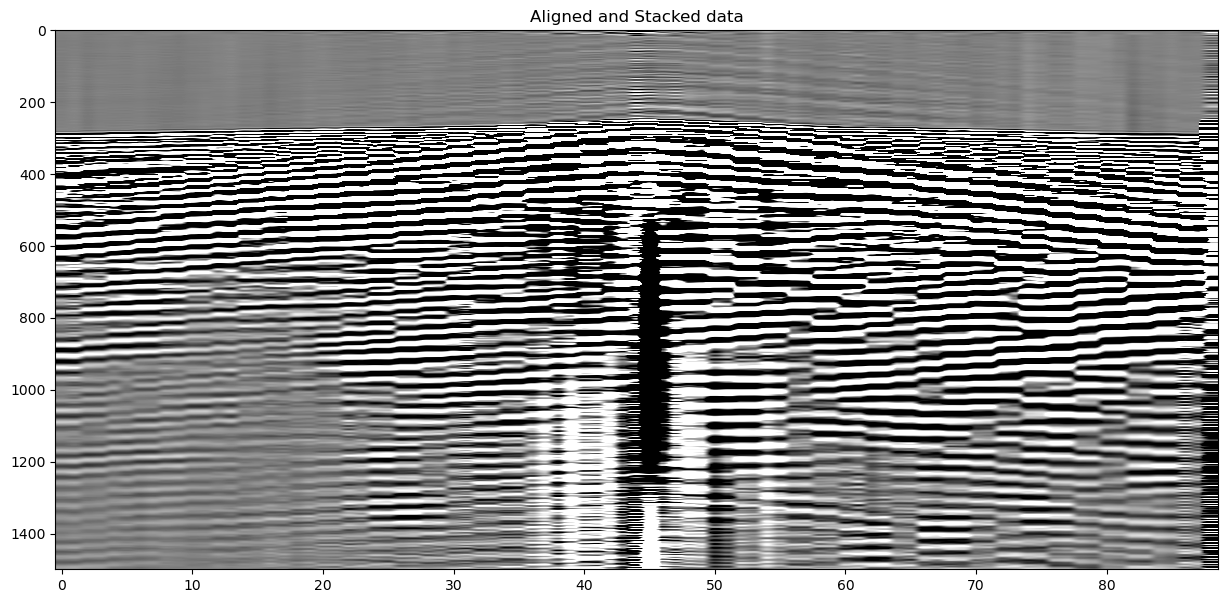

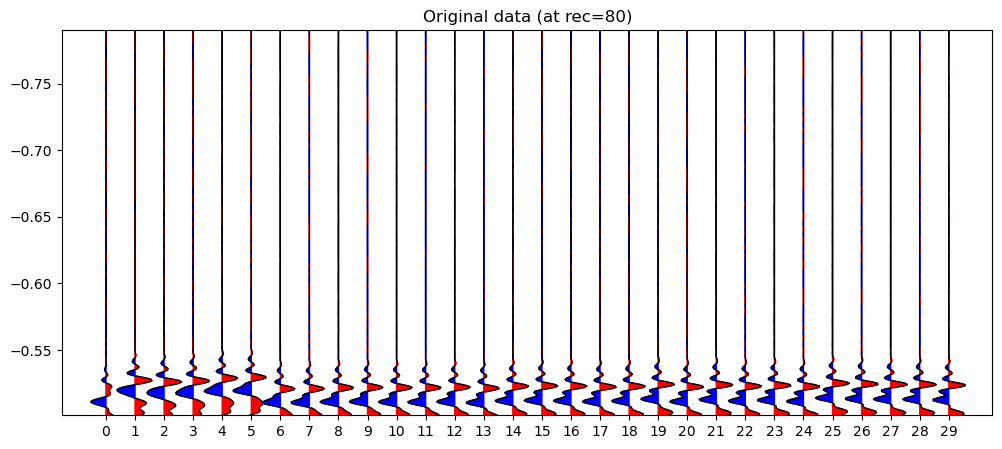

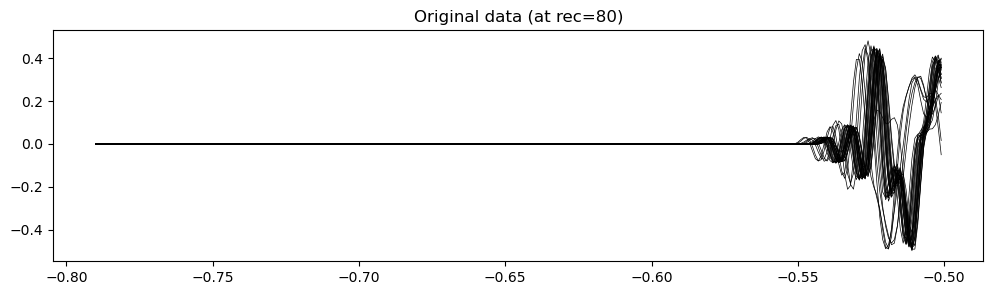

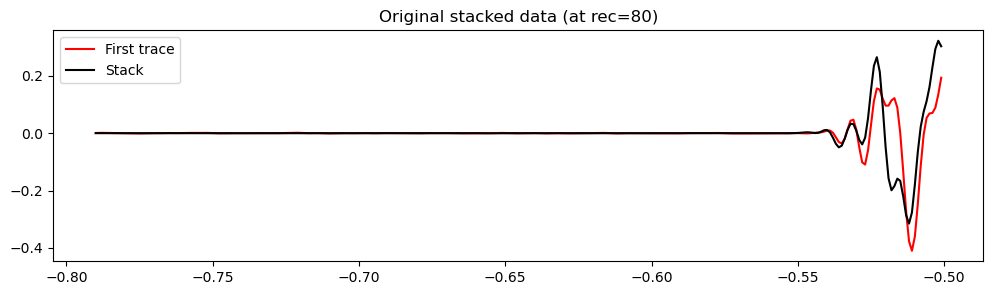

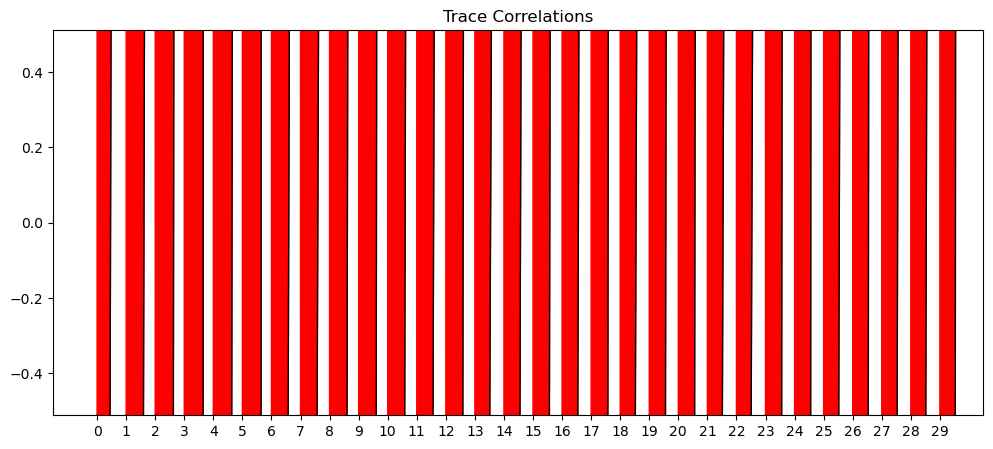

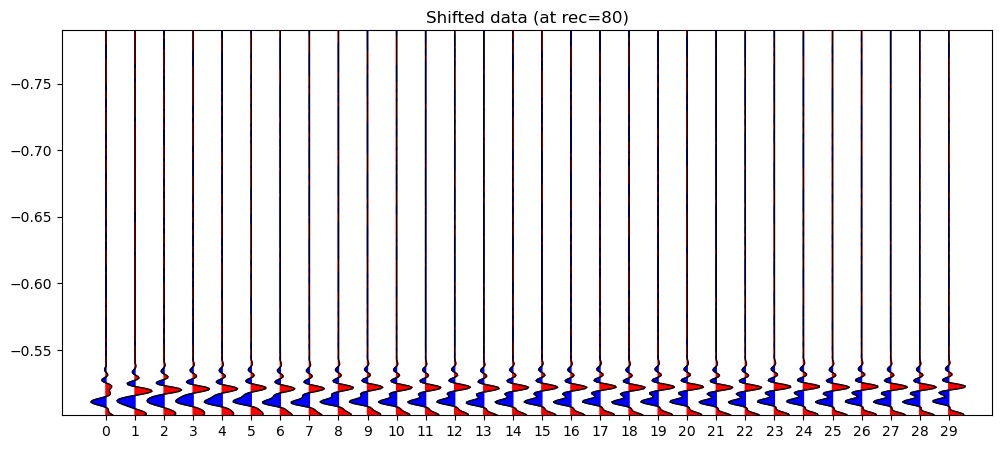

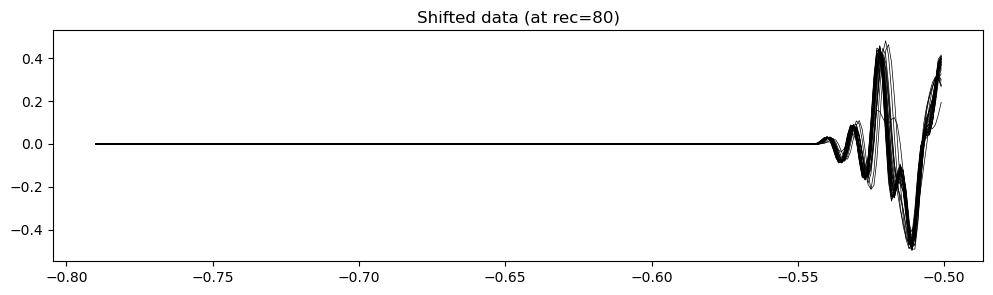

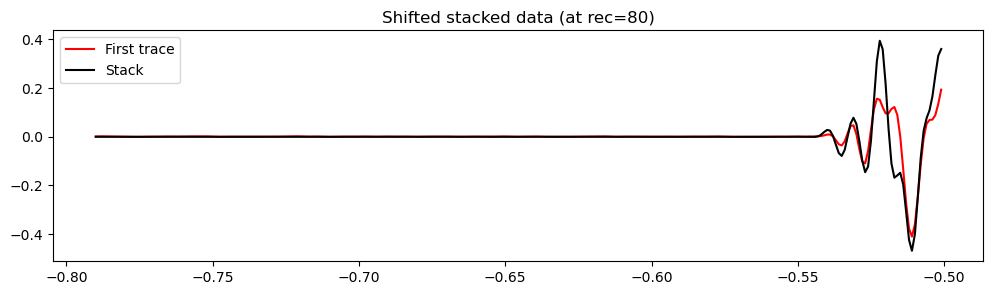

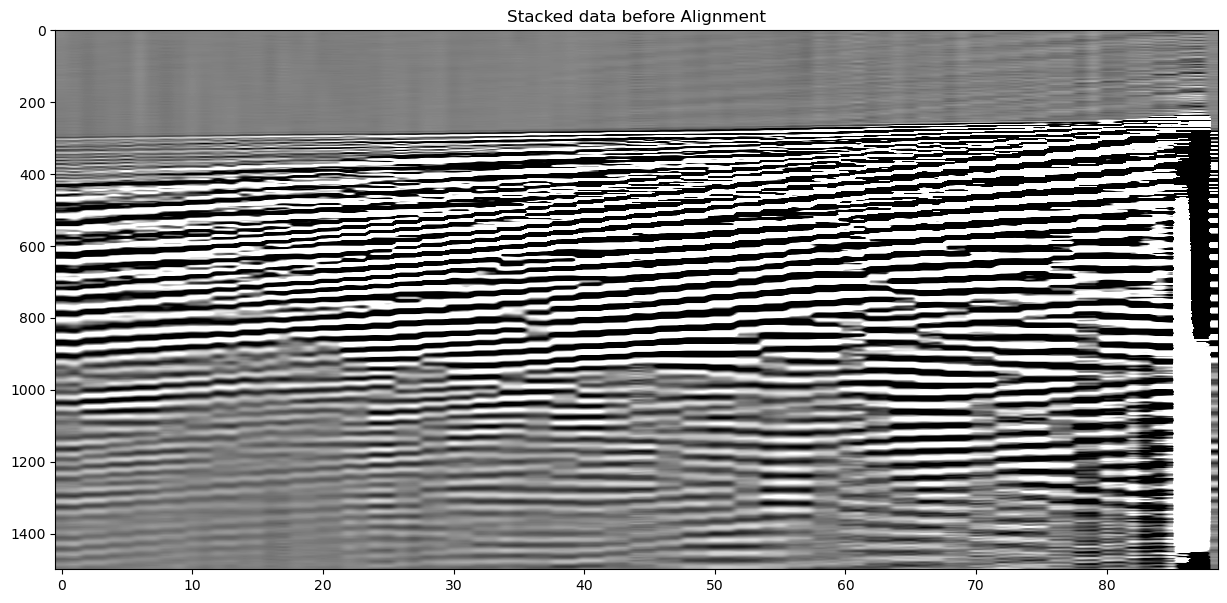

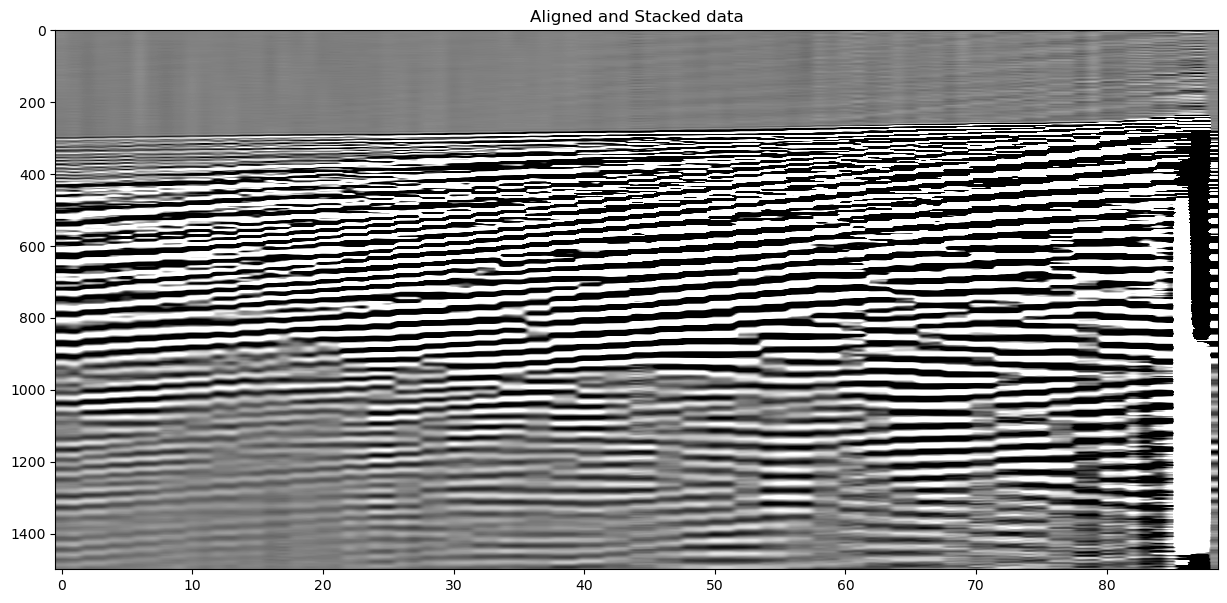

In [17]:
for ishot,nshot,irec in zip(ishots,nshots,irecs):
    print("-----------WORKING ON SHOT : %d-----------"%ishot)
    datashift, figs = aligndata(data[:nshot,ishot], irec, fs.t, tlims=(10, 300), plotflag=True)
    datastack = np.mean(datashift, axis=0)
    
    plt.figure(figsize=(15,7))
    plt.imshow(np.mean(data[:nshot, ishot,:, :1500], axis=0).T, cmap='gray', vmin=-1e-3, vmax=1e-3)
    plt.axis('tight')
    plt.title('Stacked data before Alignment')
    
    plt.figure(figsize=(15,7))
    plt.imshow(np.mean(datashift[:, :, :1500], axis=0).T, cmap='gray', vmin=-1e-3, vmax=1e-3)
    plt.axis('tight')
    plt.title('Aligned and Stacked data')
    np.savez("Stacked Data/stacked_shot%d"%ishot,data=datastack,x=x,t=t)